In [5]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pickle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab as plt
import hockey.hockey_env as h_env
import torch

import sys
sys.path.append(r"C:\Users\pi030\Documents\Uni\ReinforcementLearning\finalProject\code\RL_project\Hockey_training")
import training

## Helper Functions

In [6]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)    

In [7]:
def run(env, agent, n_episodes=100, noise=0):
    rewards = []
    observations = []
    actions = []
    for ep in range(1, n_episodes+1):
        ep_reward = 0
        state, _info = env.reset()
        for t in range(2000):
            action = agent.act(state, noise)
            state, reward, done, _trunc, _info = env.step(action)
            observations.append(state)
            actions.append(action)
            ep_reward += reward
            if done or _trunc:
                break
        rewards.append(ep_reward)
        ep_reward = 0
    print(f'Mean reward: {np.mean(rewards)}')
    observations = np.asarray(observations)
    actions = np.asarray(actions)
    return observations, actions, rewards

# Plot rewards and losses

In [8]:
env_name = "Hockey"

with open(f"C:/Users/pi030/Documents/Uni/ReinforcementLearning/finalProject/code/RL_Project/Hockey_training/results/TD3_selfplay/TD3_pure_Hockey-m10000.0-eps0.3-t32-l0.0005-s1-oselfplay-stat.pkl", 'rb') as f:
    data = pickle.load(f)
    rewards = np.asarray(data["rewards"])
    losses =  np.asarray(data["losses"])
    

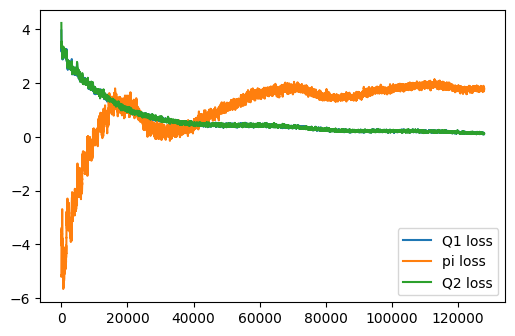

In [10]:
fig=plt.figure(figsize=(6,3.8))
plt.plot(running_mean(losses[:,0],50),label=f"Q1 loss")
plt.plot(running_mean(losses[:,2],50),label=f"pi loss")
plt.plot(running_mean(losses[:,1],50),label=f"Q2 loss")
plt.legend()

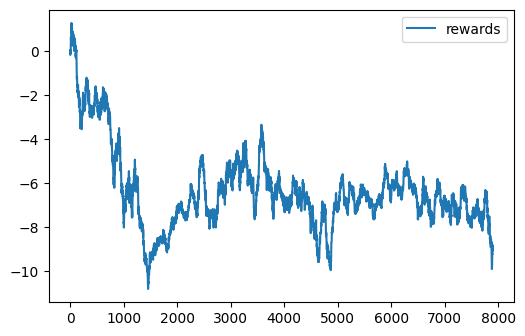

In [12]:
fig=plt.figure(figsize=(6,3.8))
plt.plot(running_mean(rewards,100),label=f"rewards")
plt.legend()

### Exploration Noise dependency

In [188]:
rewards = {}
eps=[0.1,0.3,0.5]

for e in eps:
    with open(f"./results/EpsVergleich/DDPG-default_pure_Hockey-u20.0-m2500.0-eps{e}-t32-l0.0005-s1-stat.pkl", 'rb') as f:
        data = pickle.load(f)
        rewards[e] = data["rewards"]

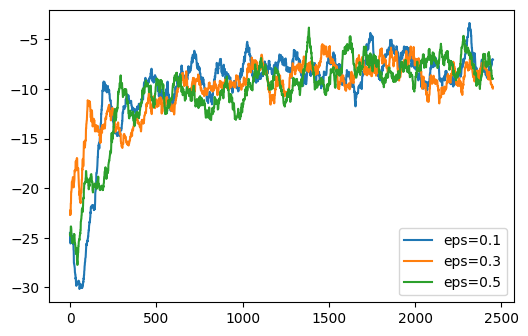

In [189]:
fig=plt.figure(figsize=(6,3.8))
for eps,rew in rewards.items():
    plt.plot(running_mean(rew,50),label=f"eps={eps}")
plt.legend()

### Update interval dependency

In [158]:
rewards = {}

update=[10.0,20.0, 50.0,100.0] 
# lr = 0.0005 
# eps = 0.1

for u in update:
    with open(f"./results/UVergleich/DDPG-default_pure_Hockey-u{u}-m2500.0-eps0.1-t32-l0.0005-s1-stat.pkl", 'rb') as f:
        data = pickle.load(f)
        rewards[data["update_every"]] = data["rewards"]

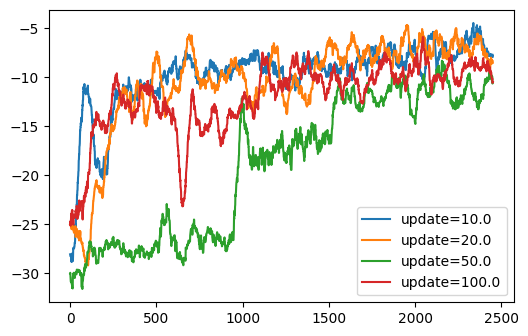

In [159]:
fig=plt.figure(figsize=(6,3.8))
for update,rew in rewards.items():
    plt.plot(running_mean(rew,50),label=f"update={update}")
plt.legend()

### Learning rate dependency

In [6]:
rewards = {}
lrs = [0.0005, 0.0001, 0.00005]

# update every = 20
# eps = 0.1

for lr in lrs:
    with open(f"./results/LrVergleich/DDPG-default_pure_Hockey-m2500.0-eps0.1-t32-l{lr}-s1-stat.pkl", 'rb') as f:
        data = pickle.load(f)
        rewards[data["lr"]] = data["rewards"]

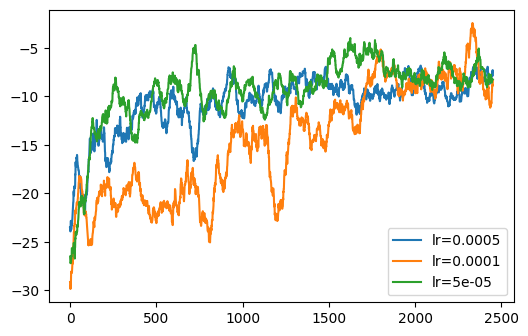

In [7]:
fig=plt.figure(figsize=(6,3.8))
for lr,rew in rewards.items():
    plt.plot(running_mean(rew,50),label=f"lr={lr}")
plt.legend()

### 1.04 algorithm modifications

In [219]:
env_name="Pendulum-v1"
rewards = {}
lr = 0.0001
eps=0.1
ts=32
seed=1

base_path = "C:/Users/pi030/Documents/Uni/ReinforcementLearning/finalProject/code/RL_Project/Gym-DDPG-solution/"
paths = [[base_path + f"results/DDPG_{env_name}-eps{eps}-t{ts}-l{lr}-sNone-stat.pkl", "DDPG"],
    [base_path + f"results/pink/DDPG_{env_name}-m2000-eps{eps}-t{ts}-l{lr}-s{seed}-stat.pkl", "pinkNoise"],
    [base_path + f"results/RND/DDPG-default_RND_{env_name}-m2000.0-eps{eps}-t{ts}-l{lr}-sNone-stat.pkl", "RND"],
    [base_path + f"results/pinkRND/DDPG_{env_name}-m2000-eps{eps}-t{ts}-l{lr}-s{seed}-stat.pkl", "pinkNoise+RND"],
    [base_path + f"results/TD3_DDPG-default_{env_name}-m2000.0-eps{eps}-t{ts}-l{lr}-sNone-stat.pkl", "TD3"]]
for path in paths:
    with open(path[0], 'rb') as f:
        data = pickle.load(f)
        rewards[path[1]] = data["rewards"]

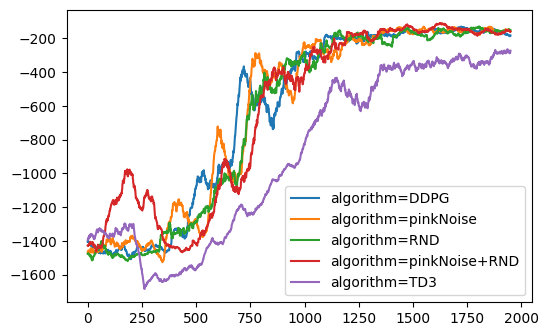

In [220]:
fig=plt.figure(figsize=(6,3.8))
for alg,rew in rewards.items():
    plt.plot(running_mean(rew,50),label=f"algorithm={alg}")
plt.legend()